In [73]:
from matplotlib import pyplot as plt
from matplotlib.colors import to_rgb
import numpy as np
import pandas as pd
import cv2
import imutils
%matplotlib inline

In [74]:
# https://www.pyimagesearch.com/2015/08/10/checking-your-opencv-version-using-python/
print('cv2: ', cv2.__version__)
print('imutils: ', imutils.__version__)
print("Are you using OpenCV 3.X? {}".format(imutils.is_cv3()))

cv2:  3.3.1
imutils:  0.4.5
Are you using OpenCV 3.X? True


### Color from string

In [75]:
# https://matplotlib.org/users/colors.html
def color(c):
    return tuple(int(x*255) for x in to_rgb(c))

print('red:', color('red'))
print('blue:', color('blue'))
print('green:', color('g'))

red: (255, 0, 0)
blue: (0, 0, 255)
green: (0, 127, 0)


### Contours Properties

In [76]:
def df_contours(cnts):
    df = pd.DataFrame(columns=['cx','cy', 'left', 'right', 'bottom', 'top', 'w', 'h'])
    for i, c in enumerate(cnts):
        M = cv2.moments(c)
        cx, cy = int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])
        x, y, w, h = cv2.boundingRect(c)
        df.loc[i] = pd.Series({'cx': cx, 'cy': cy, 'left': x, 'top': y, 
                               'w': w, 'h': h, 'bottom': y+h, 'right': x+w})
    return df

def df_image(image):
    df = pd.DataFrame(columns=['cx','cy', 'left', 'right', 'bottom', 'top', 'w', 'h'])
    

def center(df, i=0, offset=0):
    return tuple(df.loc[i, ['cx','cy']] + offset)

def lt(df, i=0, offset=0):
    '''Left Top'''
    return tuple(df.loc[i, ['left','top']] + offset)

def rb(df, i=0, offset=0):
    '''Right Bottom'''
    return tuple(df.loc[i, ['right','bottom']] + offset)


### Street Sketch

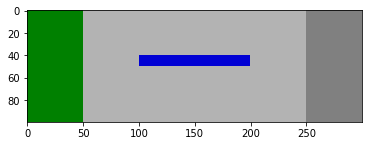

In [77]:
image = cv2.imread("drawing01.png")
plt.imshow(image)

In [78]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(_, thresh) = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY_INV)
(_, cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

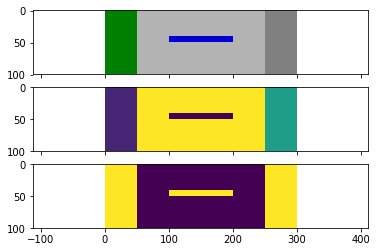

In [79]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
for ax, im in zip(axes.flat, [image, gray, thresh]):
    ax.imshow(im)

In [80]:
df = df_contours(cnts)
df

,cx,cy,left,right,bottom,top,w,h
0,149,44,100,200,50,40,100,10
1,274,49,250,300,100,0,50,100
2,24,49,0,50,100,0,50,100


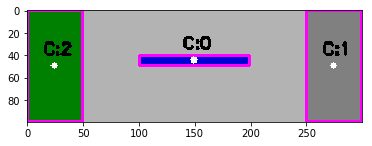

In [81]:
# https://docs.opencv.org/3.3.1/d6/d6e/group__imgproc__draw.html
thickness = 2
# Negative thickness means that a filled circle is to be drawn.
circle_thickness, radius = -1, 3
# Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
contourIdx = -1
# Text properties
fontScale, offset, font = 0.5, -10, cv2.FONT_HERSHEY_SIMPLEX

# loop over the contours
for i, c in enumerate(cnts):
    # draw the contour and center of the shape on the image
    cv2.drawContours(image, cnts, i, color('magenta'), thickness)
    cv2.circle(image, center(df, i), radius, color('white'), circle_thickness)
    cv2.putText(image, 'C:{}'.format(i), center(df, i, offset=offset), 
                font, fontScale, color('black'), thickness)

plt.imshow(image)

### Street Picture

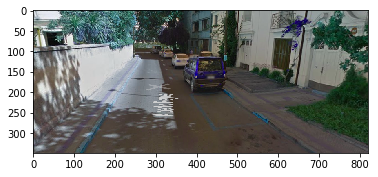

In [82]:
image = cv2.imread("calle01.png")
plt.imshow(image)

In [83]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
thresh = cv2.Canny(gray, 30, 200)
#(_, thresh) = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY_INV)
(_, cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

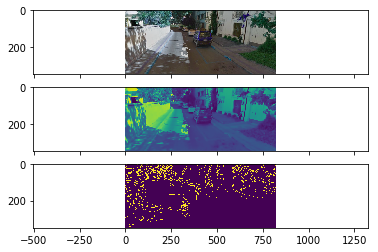

In [84]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
for ax, im in zip(axes.flat, [image, gray, thresh]):
    ax.imshow(im)

In [85]:
len(cnts)

409

In [ ]:
df = df_contours(cnts)
df

In [ ]:
# https://docs.opencv.org/3.3.1/d6/d6e/group__imgproc__draw.html
thickness = 2
# Negative thickness means that a filled circle is to be drawn.
circle_thickness, radius = -1, 3
# Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
contourIdx = -1
# Text properties
fontScale, offset, font = 0.5, -10, cv2.FONT_HERSHEY_SIMPLEX

# loop over the contours
for i, c in enumerate(cnts):
    # draw the contour and center of the shape on the image
    cv2.drawContours(image, cnts, i, color('magenta'), thickness)
    cv2.circle(image, center(df, i), radius, color('white'), circle_thickness)
    cv2.putText(image, 'C:{}'.format(i), center(df, i, offset=offset), 
                font, fontScale, color('black'), thickness)

plt.imshow(image)